In [1]:
from imports import *
from rvmodel import get_rv1
%matplotlib inline


Bad key "xtick.labeltop" on line 358 in
/Users/ryancloutier/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [66]:
def ew2hk(eccs, omegas):
    assert len(eccs) == len(omegas)
    hs, ks = np.zeros(len(eccs)), np.zeros(len(eccs))
    for i in range(len(eccs)):
        hs[i] = np.sqrt(eccs[i])*np.cos(omegas[i])
        ks[i] = np.sqrt(eccs[i])*np.sin(omegas[i])
    return hs, ks

In [67]:
# setup planetary system
P, T0, Ms, mp = 2., 0., .2, 5.
K = rvs.RV_K(P, Ms, mp)
sma = rvs.semimajoraxis(P, Ms, mp)
eccs = np.array([0., .3])
omegas = np.zeros(2)
hs, ks = ew2hk(eccs, omegas)

In [73]:
# setup rv curves and positions
N = 200
#tarr = np.arange(0, 1, 1./N)
tarr = np.linspace(0, P, N)
nu1,kep1 = get_rv1((P,T0,0,K,hs[0],ks[0]), tarr)
nu2,kep2 = get_rv1((P,T0,0,K,hs[1],ks[1]), tarr)
r1 = sma * (1.-eccs[0]**2) / (1.+eccs[0]*np.cos(nu1))
r2 = sma * (1.-eccs[1]**2) / (1.+eccs[1]*np.cos(nu2))
x1, y1 = r1*np.cos(nu1+np.pi), r1*np.sin(nu1+np.pi)
x2, y2 = r2*np.cos(nu2+np.pi), r2*np.sin(nu2+np.pi)

0.0
0.005
0.01
0.015
0.02
0.025
0.03
0.035
0.04
0.045
0.05
0.055
0.06
0.065
0.07
0.075
0.08
0.085
0.09
0.095
0.1
0.105
0.11
0.115
0.12
0.125
0.13
0.135
0.14
0.145
0.15
0.155
0.16
0.165
0.17
0.175
0.18
0.185
0.19
0.195
0.2
0.205
0.21
0.215
0.22
0.225
0.23
0.235
0.24
0.245
0.25
0.255
0.26
0.265
0.27
0.275
0.28
0.285
0.29
0.295
0.3
0.305
0.31
0.315
0.32
0.325
0.33
0.335
0.34
0.345
0.35
0.355
0.36
0.365
0.37
0.375
0.38
0.385
0.39
0.395
0.4
0.405
0.41
0.415
0.42
0.425
0.43
0.435
0.44
0.445
0.45
0.455
0.46
0.465
0.47
0.475
0.48
0.485
0.49
0.495
0.5
0.505
0.51
0.515
0.52
0.525
0.53
0.535
0.54
0.545
0.55
0.555
0.56
0.565
0.57
0.575
0.58
0.585
0.59
0.595
0.6
0.605
0.61
0.615
0.62
0.625
0.63
0.635
0.64
0.645
0.65
0.655
0.66
0.665
0.67
0.675
0.68
0.685
0.69
0.695
0.7
0.705
0.71
0.715
0.72
0.725
0.73
0.735
0.74
0.745
0.75
0.755
0.76
0.765
0.77
0.775
0.78
0.785
0.79
0.795
0.8
0.805
0.81
0.815
0.82
0.825
0.83
0.835
0.84
0.845
0.85
0.855
0.86
0.865
0.87
0.875
0.88
0.885
0.89
0.895
0.9
0.905
0.91
0.91

IndexError: index 200 is out of bounds for axis 0 with size 200

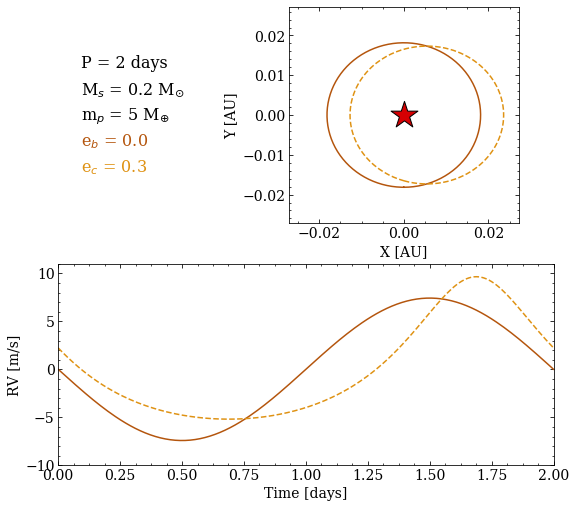

In [113]:
# run animation
for i in range(N):
    
    print i/float(N)
    
    # plot base
    fig = plt.figure(figsize=(8,7))
    ax1 = fig.add_axes([.5,.56,.4,.43])
    ax2 = fig.add_axes([.1,.08,.86,.4])

    # plot info
    x, y, dy = -.9, .72, .12
    ax1.text(x, y, 'P = %i days'%P, fontsize=16, transform=ax1.transAxes)
    ax1.text(x, y-dy, 'M$_s$ = %.1f M$_{\odot}$'%Ms, fontsize=16, transform=ax1.transAxes)
    ax1.text(x, y-dy*2, 'm$_p$ = %i M$_{\oplus}$'%mp, fontsize=16, transform=ax1.transAxes)
    cols = ['#B4550D','#DF9213']
    ax1.text(x, y-dy*3, 'e$_b$ = %.1f'%eccs[0], fontsize=16, transform=ax1.transAxes, color=cols[0])
    ax1.text(x, y-dy*4, 'e$_c$ = %.1f'%eccs[1], fontsize=16, transform=ax1.transAxes, color=cols[1])

    # plot configuration
    ax1.scatter([0], [0], marker='*', s=800, facecolor='#D50002', edgecolor='k')
    ax1.plot(x1, y1, '-', c=cols[0])
    ax1.plot(x2, y2, '--', c=cols[1])
    ax1.set_xlim((-1.5*sma, 1.5*sma))
    ax1.set_ylim((-1.5*sma, 1.5*sma))
    ax1.set_xlabel('X [AU]', fontsize=14), ax1.set_ylabel('Y [AU]', fontsize=14)

    # plot keplerian models
    ax2.plot(tarr, kep1, '-', c=cols[0])
    ax2.plot(tarr, kep2, '--', c=cols[1])
    ax2.set_xlim((0,P)), ax2.set_ylim((-10,11))
    ax2.set_xlabel('Time [days]', fontsize=14), ax2.set_ylabel('RV [m/s]', fontsize=14)

    # plot positions
    i += 1
    ax1.plot(x1[i], y1[i], 'o', c=cols[0], ms=10)
    ax1.plot(x2[i], y2[i], 'o', c=cols[1], ms=10)
    ax1.plot(x1[:i], y1[:i], '-', c=cols[0], lw=5)
    ax1.plot(x2[:i], y2[:i], '-', c=cols[1], lw=5)
    
    # plot RV curve
    ax2.plot(tarr[i], kep1[i], 'o', c=cols[0], ms=10)
    ax2.plot(tarr[i], kep2[i], 'o', c=cols[1], ms=10)
    ax2.plot(tarr[:i], kep1[:i], '-', c=cols[0], lw=5)
    ax2.plot(tarr[:i], kep2[:i], '-', c=cols[1], lw=5)
    
    plt.savefig('RVcurve_%.4d.png'%i)
    plt.close('all')